<a href="https://colab.research.google.com/github/pojithakota123/ADS-clustering-and-fitting-assignment/blob/main/assignment_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Pavan akula

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dataset =  pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [ ]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train_dataset[['Deck','Num','Side']]= train_dataset['Cabin'].str.split('/',expand=True,)
test_dataset[['Deck','Num','Side']]= test_dataset['Cabin'].str.split('/',expand=True,)

In [ ]:
#checking for different type of datatypes in the dataset.
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Num           8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


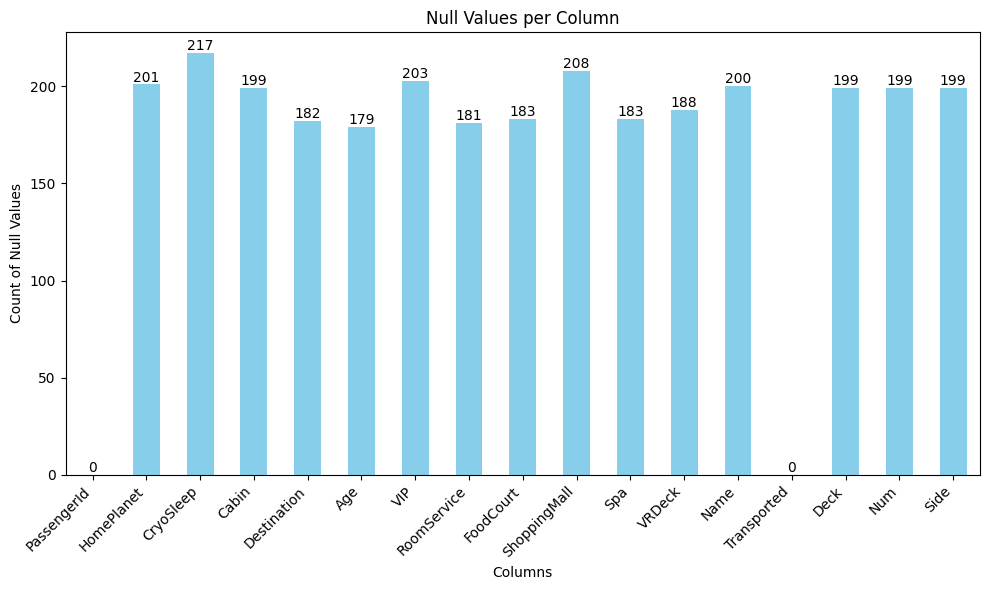

In [ ]:
#checking for Null values

null_counts = train_dataset.isnull().sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = null_counts.plot(kind='bar', color='skyblue')
plt.title('Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()
plt.show()

by Poojitha Kota

In [ ]:
from sklearn.impute import SimpleImputer

# Columns with missing values in the train and test datasets
missing_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age', 'VIP', 'HomePlanet', 'Destination', 'CryoSleep']

# Initialize SimpleImputer with appropriate strategy
imputer = SimpleImputer(strategy='median')  # Use median strategy for numeric features
train_dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']] = imputer.fit_transform(train_dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']])
test_dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']] = imputer.transform(test_dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']])

imputer = SimpleImputer(strategy='constant', fill_value=False)  # Use constant strategy for boolean features
train_dataset[['VIP', 'CryoSleep']] = imputer.fit_transform(train_dataset[['VIP', 'CryoSleep']])
test_dataset[['VIP', 'CryoSleep']] = imputer.transform(test_dataset[['VIP', 'CryoSleep']])

imputer = SimpleImputer(strategy='constant', fill_value='Mars')  # Use constant strategy for categorical features
train_dataset[['HomePlanet']] = imputer.fit_transform(train_dataset[['HomePlanet']])
test_dataset[['HomePlanet']] = imputer.transform(test_dataset[['HomePlanet']])

imputer = SimpleImputer(strategy='constant', fill_value='PSO J318.5-22')  # Use constant strategy for categorical features
train_dataset[['Destination']] = imputer.fit_transform(train_dataset[['Destination']])
test_dataset[['Destination']] = imputer.transform(test_dataset[['Destination']])


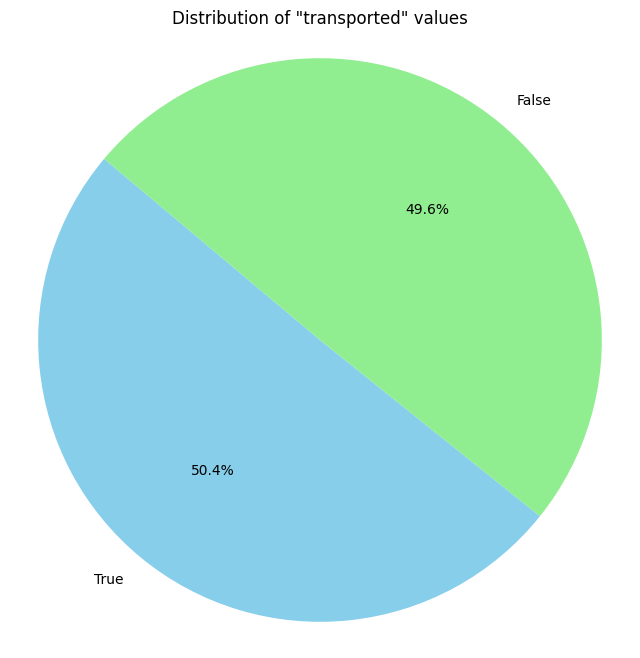

In [ ]:
  transported_counts = train_dataset['Transported'].value_counts()
# Plotting
plt.figure(figsize=(8, 8))
plt.pie(transported_counts, labels=transported_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of "transported" values')
plt.axis('equal')
plt.show()

Count of transported and not transported individuals by home planet:
Transported  False  True 
HomePlanet               
Earth         2651   1951
Europa         727   1404
Mars           937   1023


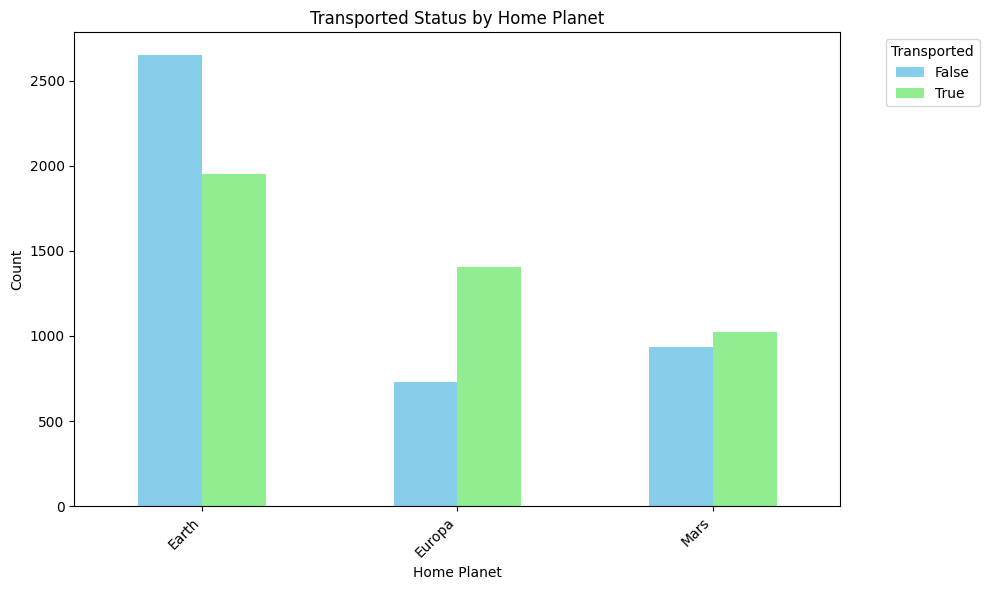

In [ ]:
grouped = train_dataset.groupby(['HomePlanet', 'Transported']).size().unstack(fill_value=0)
grouped.plot(kind='bar',  color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title('Transported Status by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Print count of transported and not transported individuals by home planet
print("Count of transported and not transported individuals by home planet:")
print(grouped)
plt.show()

by Sai Sudheer Meka

Count of transported and not transported individuals by home planet and age group:
Transported    False  True 
Destination                
55 Cancri e      702   1098
PSO J318.5-22    485    493
TRAPPIST-1e     3128   2787


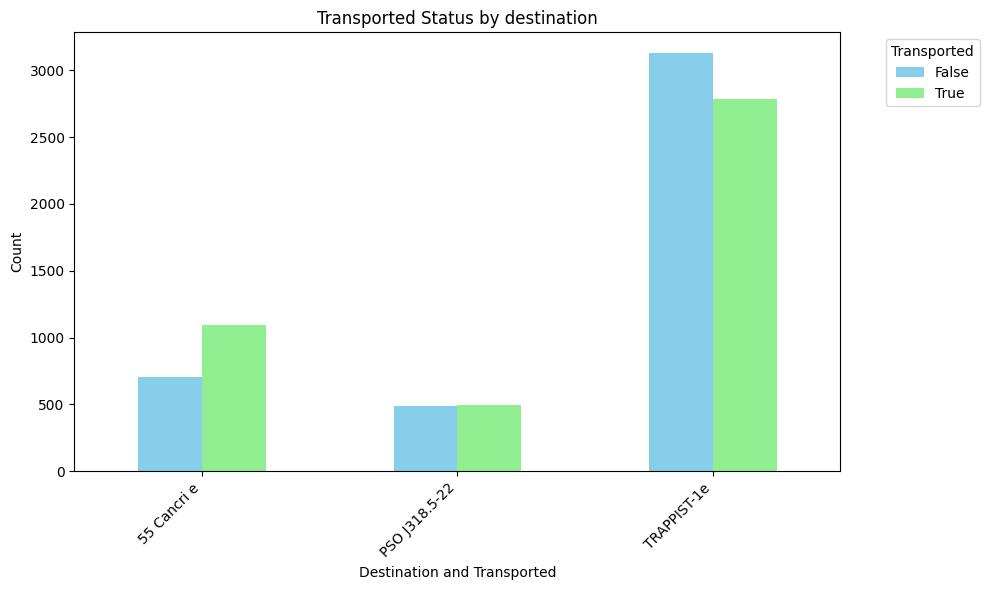

In [ ]:
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51+']
train_dataset['age_group'] = pd.cut(train_dataset['Age'], bins=bins, labels=labels, right=False)

# Group by home_planet and age_group, then count occurrences
grouped = train_dataset.groupby(['Destination', 'Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title('Transported Status by destination')
plt.xlabel('Destination and Transported')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Print count of transported and not transported individuals by home planet and age group
print("Count of transported and not transported individuals by home planet and age group:")
print(grouped)

plt.show()

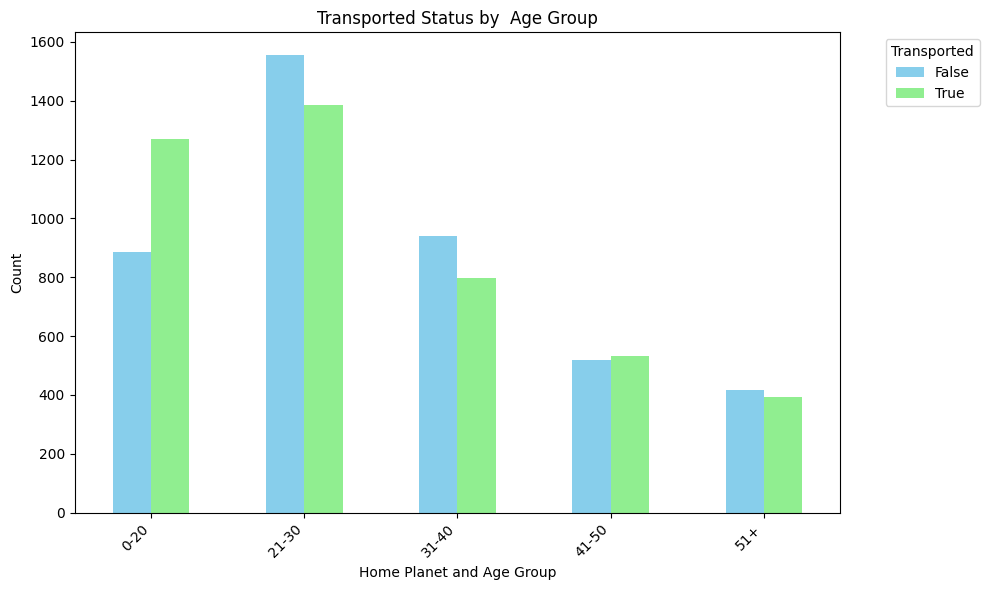

In [ ]:
grouped = train_dataset.groupby(['age_group', 'Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title('Transported Status by  Age Group')
plt.xlabel('Home Planet and Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

By anantha Kumar Nallapaneni

Count of transported and not transported individuals by home planet and age group:
Transported               False  True 
HomePlanet Destination                
Earth      55 Cancri e      342    348
           PSO J318.5-22    415    396
           TRAPPIST-1e     1894   1207
Europa     55 Cancri e      275    611
           PSO J318.5-22     18     38
           TRAPPIST-1e      434    755
Mars       55 Cancri e       85    139
           PSO J318.5-22     52     59
           TRAPPIST-1e      800    825


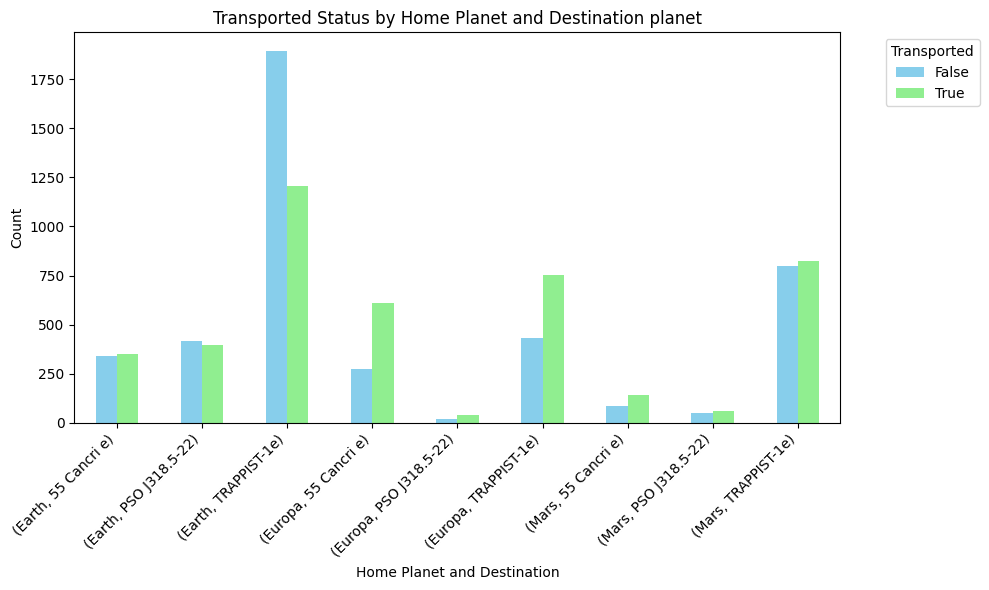

In [ ]:
grouped = train_dataset.groupby(['HomePlanet','Destination', 'Transported']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar',  color=['skyblue', 'lightgreen'], figsize=(10, 6))
plt.title('Transported Status by Home Planet and Destination planet')
plt.xlabel('Home Planet and Destination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transported', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Print count of transported and not transported individuals by home planet and age group
print("Count of transported and not transported individuals by home planet and age group:")
print(grouped)

plt.show()

In [ ]:
#feature selection and extraction

train_dataset_new = train_dataset.drop(['age_group','PassengerId','Name','Cabin'],axis=  1)
test_dataset_new =  test_dataset.drop(['PassengerId','Name','Cabin'],axis=  1)

In [ ]:
train_dataset_new

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [ ]:
#label encoding catogorical values
from sklearn.preprocessing import LabelEncoder
catogrical_coloumns= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in catogrical_coloumns:
    LE = LabelEncoder()
    arr = np.concatenate((train_dataset_new[i], test_dataset_new[i])).astype(str)
    LE.fit(arr)
    train_dataset_new[i] = LE.transform(train_dataset_new[i].astype(str))
    test_dataset_new[i] = LE.transform(test_dataset_new[i].astype(str))

In [ ]:
train_dataset_new

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,1872,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,556,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,6,559,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,4,1460,1


In [ ]:
train_dataset_new['Transported'] = train_dataset_new['Transported'].replace({True:1,False:0})

In [ ]:
X = train_dataset_new.drop('Transported',axis=1)
y =train_dataset_new['Transported']

by Shahid Shaik

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the base classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('svm', svm_classifier), ('logistic', logistic_classifier)],
    voting='hard'
)

In [ ]:
# Define hyperparameters to search
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 10],
    'svm__C': [0.1, 1],
    'svm__gamma': ['scale', 'auto'],
    'logistic__C': [0.1, 1]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'logistic__C': 1, 'rf__max_depth': 10, 'rf__n_estimators': 100, 'svm__C': 1, 'svm__gamma': 'scale'}
Best Accuracy: 0.7988281585963705


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict on the test set with the best model
from sklearn.metrics import accuracy_score, precision_score,f1_score
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Best Model:", accuracy)

accuracy = precision_score(y_test, y_pred)
print("Test Set precision with Best Model:", accuracy)

accuracy = f1_score(y_test, y_pred)
print("Test Set F1 with Best Model:", accuracy)



Test Set Accuracy with Best Model: 0.7957639939485628
Test Set precision with Best Model: 0.772169167803547
Test Set F1 with Best Model: 0.8074179743223966


by Pavanteja Turaka

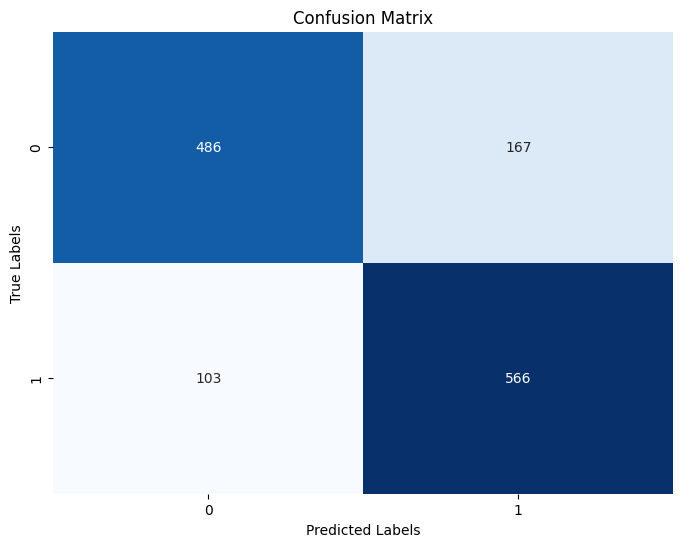

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

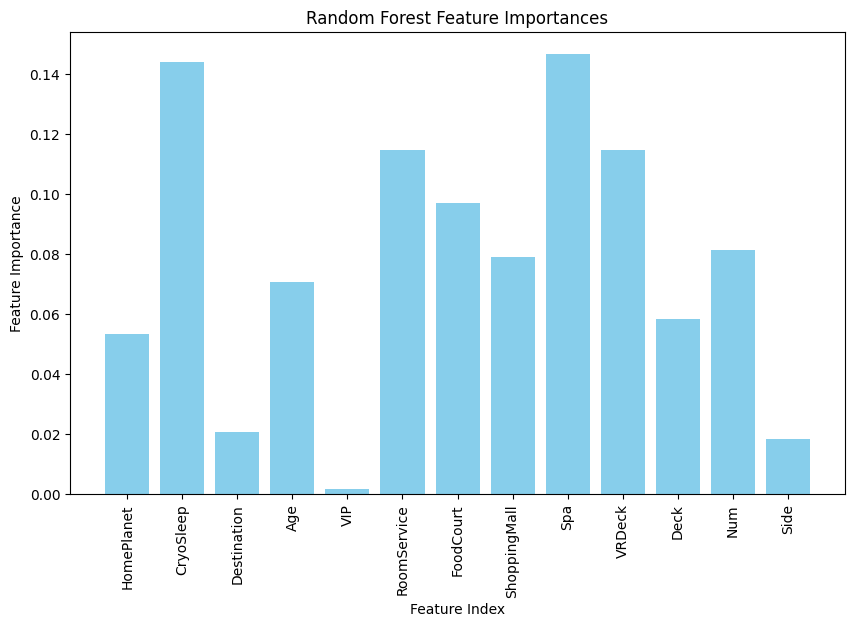

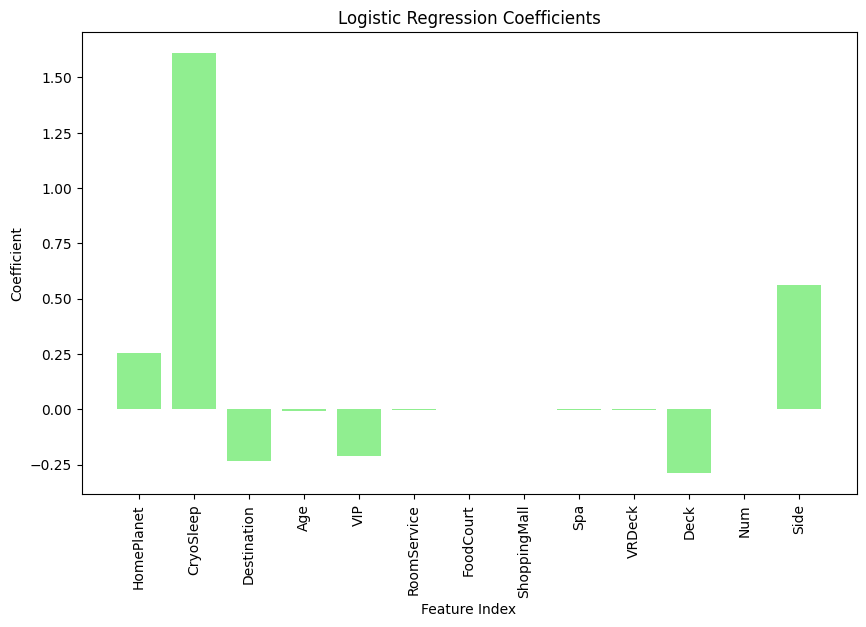

In [ ]:
# Get the best Random Forest and Logistic Regression estimators from the Voting Classifier
rf_estimator = grid_search.best_estimator_.named_estimators_['rf']
logistic_estimator = grid_search.best_estimator_.named_estimators_['logistic']

# Get feature importances for Random Forest
rf_feature_importances = rf_estimator.feature_importances_

# Get coefficients for Logistic Regression
logistic_coefficients = logistic_estimator.coef_[0]

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_feature_importances)), rf_feature_importances, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.xticks(range(len(rf_feature_importances)), X.columns, rotation=90)
plt.show()

# Plot coefficients for Logistic Regression
plt.figure(figsize=(10, 6))
plt.bar(range(len(logistic_coefficients)), logistic_coefficients, color='lightgreen')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.title("Logistic Regression Coefficients")
plt.xticks(range(len(rf_feature_importances)), X.columns, rotation=90)
plt.show()

In [ ]:
pred = grid_search.best_estimator_.predict(test_dataset_new)

In [ ]:
test_dataset['PassengerId'].values

array(['0013_01', '0018_01', '0019_01', ..., '9271_01', '9273_01',
       '9277_01'], dtype=object)

In [ ]:
output = pd.DataFrame({'PassengerId': test_dataset['PassengerId'].values, 'Transported': pred})

In [ ]:
output['Transported'] = output['Transported'].map({0: 'False', 1: 'True'})

In [ ]:
output.to_csv('submission.csv', index=False)